In [59]:
import torch

torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 3 + 0.1 * torch.randn(100, 1)

In [60]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 20)  # wejście → 20 neuronów
        self.relu = nn.ReLU()          # aktywacja
        self.output = nn.Linear(20, 1) # 20 neuronów → 1 wyjście

    def forward(self, x):
        x = self.hidden(x)     # warstwa ukryta
        x = self.relu(x)       # aktywacja
        x = self.output(x)     # warstwa wyjściowa
        return x


In [61]:
model = MyModel()
loss_fn = nn.MSELoss()  # funkcja straty
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # optymalizator


In [62]:
for epoch in range(1000):
    y_pred = model(x)                  # forward pass
    loss = loss_fn(y_pred, y)         # obliczamy stratę

    optimizer.zero_grad()             # zerujemy gradienty
    loss.backward()                   # backpropagation
    optimizer.step()                  # aktualizacja wag

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 15.8821
Epoch 100, Loss: 0.0078
Epoch 200, Loss: 0.0078
Epoch 300, Loss: 0.0078
Epoch 400, Loss: 0.0078
Epoch 500, Loss: 0.0078
Epoch 600, Loss: 0.0078
Epoch 700, Loss: 0.0078
Epoch 800, Loss: 0.0078
Epoch 900, Loss: 0.0078


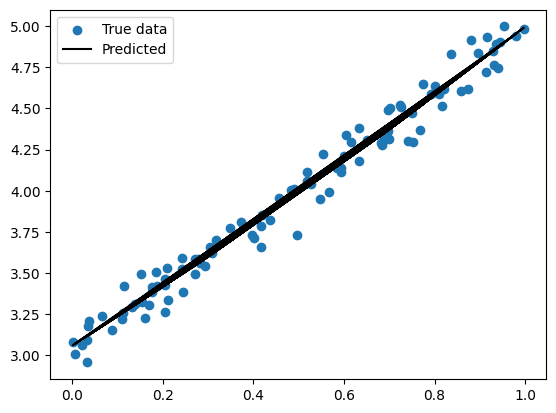

In [63]:
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), label="True data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="black", label="Predicted")
plt.legend()
plt.show()
